In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import scipy 


In [2]:
# input the data
amb_temp = pd.read_csv("amb_temp.csv")
comp_temp = pd.read_csv("comp_temp.csv")
mcu_temp = pd.read_csv("mcu_temp.csv")
current = pd.read_csv("current.csv")
power = pd.read_csv("power.csv")
#---
door = pd.read_csv("door.csv")
energy = pd.read_csv("energy.csv")
power_factor = pd.read_csv("power_factor.csv")
voltage = pd.read_csv("voltage.csv")
zcontrol = pd.read_csv("zcontrol.csv")

#mearging the data and a bit cleaning.
data = pd.concat([amb_temp, comp_temp, mcu_temp ,current ,door,energy ,power ,power_factor ,voltage ,zcontrol], axis = 1)
data.columns = ["date",'amb_temp', "date",'comp_temp', "date",'mcu_temp' ,"date",'current' ,"date",'door',"date",'energy' ,"date",'power' ,"date",'power_factor' ,"date",'voltage' ,"date",'zcontrol']
data = data[['amb_temp','comp_temp','mcu_temp']]

In [5]:
data.isnull().any()

amb_temp     False
comp_temp    False
mcu_temp     False
power        False
current      False
dtype: bool

In [3]:
from sklearn.cluster import KMeans, DBSCAN

In [4]:
data = np.array(data)

In [34]:
kmeans = KMeans(n_clusters= 3)

In [35]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[ 0.60481451,  1.31510273],
       [ 0.68666869, -0.62808392],
       [-1.30041378, -0.66384361]])

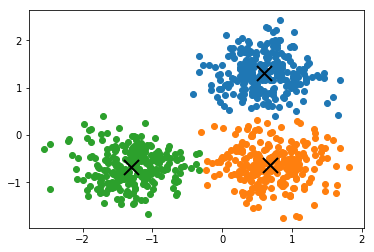

In [39]:
for i in range(3):
    ds = data[np.where(labels==i)]
    
    plt.plot(ds[:,0],ds[:,1],'o')
    
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)

In [40]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [41]:
centers = [ 0.60481451,  1.31510273], [ 0.68666869, -0.62808392],[-1.30041378, -0.66384361]
data, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

#data= StandardScaler().fit_transform(data)

In [42]:
from sklearn import metrics
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 1
Homogeneity: 0.000
Completeness: 0.002
V-measure: 0.000
Adjusted Rand Index: -0.000
Adjusted Mutual Information: -0.001
Silhouette Coefficient: 0.230


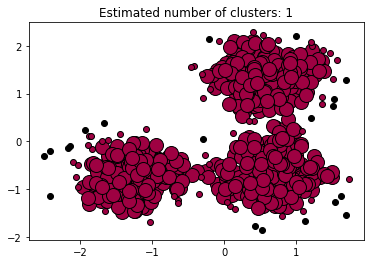

In [43]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()